# Exercício 03 - Aula 04: 11/09/2023

Utilize o dataset de Insurance com as categorias criadas abaixo, faça o treinamento do K vizinhos para as classes escolhidas usando os Scalers que acabamos de conhecer e compare a performance

Passo a passo
1. Escolha um Scaler e faça o instanciamento

2. Faça o fit transform dos dados de treino e o transform dos dados de teste

3. Faça o fit com os dados escalados, e o target não escalado

4. Gere a predição com os dados de teste escalados

5. Analise as métricas usando matriz de confusão e classification report

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Tratando o dataset

In [3]:
df = pd.read_csv("Datasets/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [8]:
df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [9]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [10]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [11]:
# Fazer o encoder das colunas sex, smoker e region para fazermos as análises.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
# female = 0 | male = 1
sex_encoded = le.fit_transform(df.sex)
sex_encoded

array([0, 1, 1, ..., 0, 0, 0])

In [13]:
# not smoker = 0 | smoker = 1
smoker_encoded = le.fit_transform(df.smoker)
smoker_encoded

array([1, 0, 0, ..., 0, 0, 1])

In [14]:
# northeast = 0 | northwest = 1 | southeast = 2 | southwest = 3
region_encoded = le.fit_transform(df.region)
region_encoded

array([3, 2, 2, ..., 2, 3, 1])

In [15]:
df['age']

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [16]:
# Novo df com as colunas encodadas
df_norm = pd.DataFrame({
  'age': df['age'],
  'sex': sex_encoded,
  'bmi': df['bmi'],
  'children': df['children'],
  'smoker': smoker_encoded,
  'region': region_encoded,
  'charges': df['charges']
})

In [17]:
df_norm.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [18]:
df_norm.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


/home/pedropadilha/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


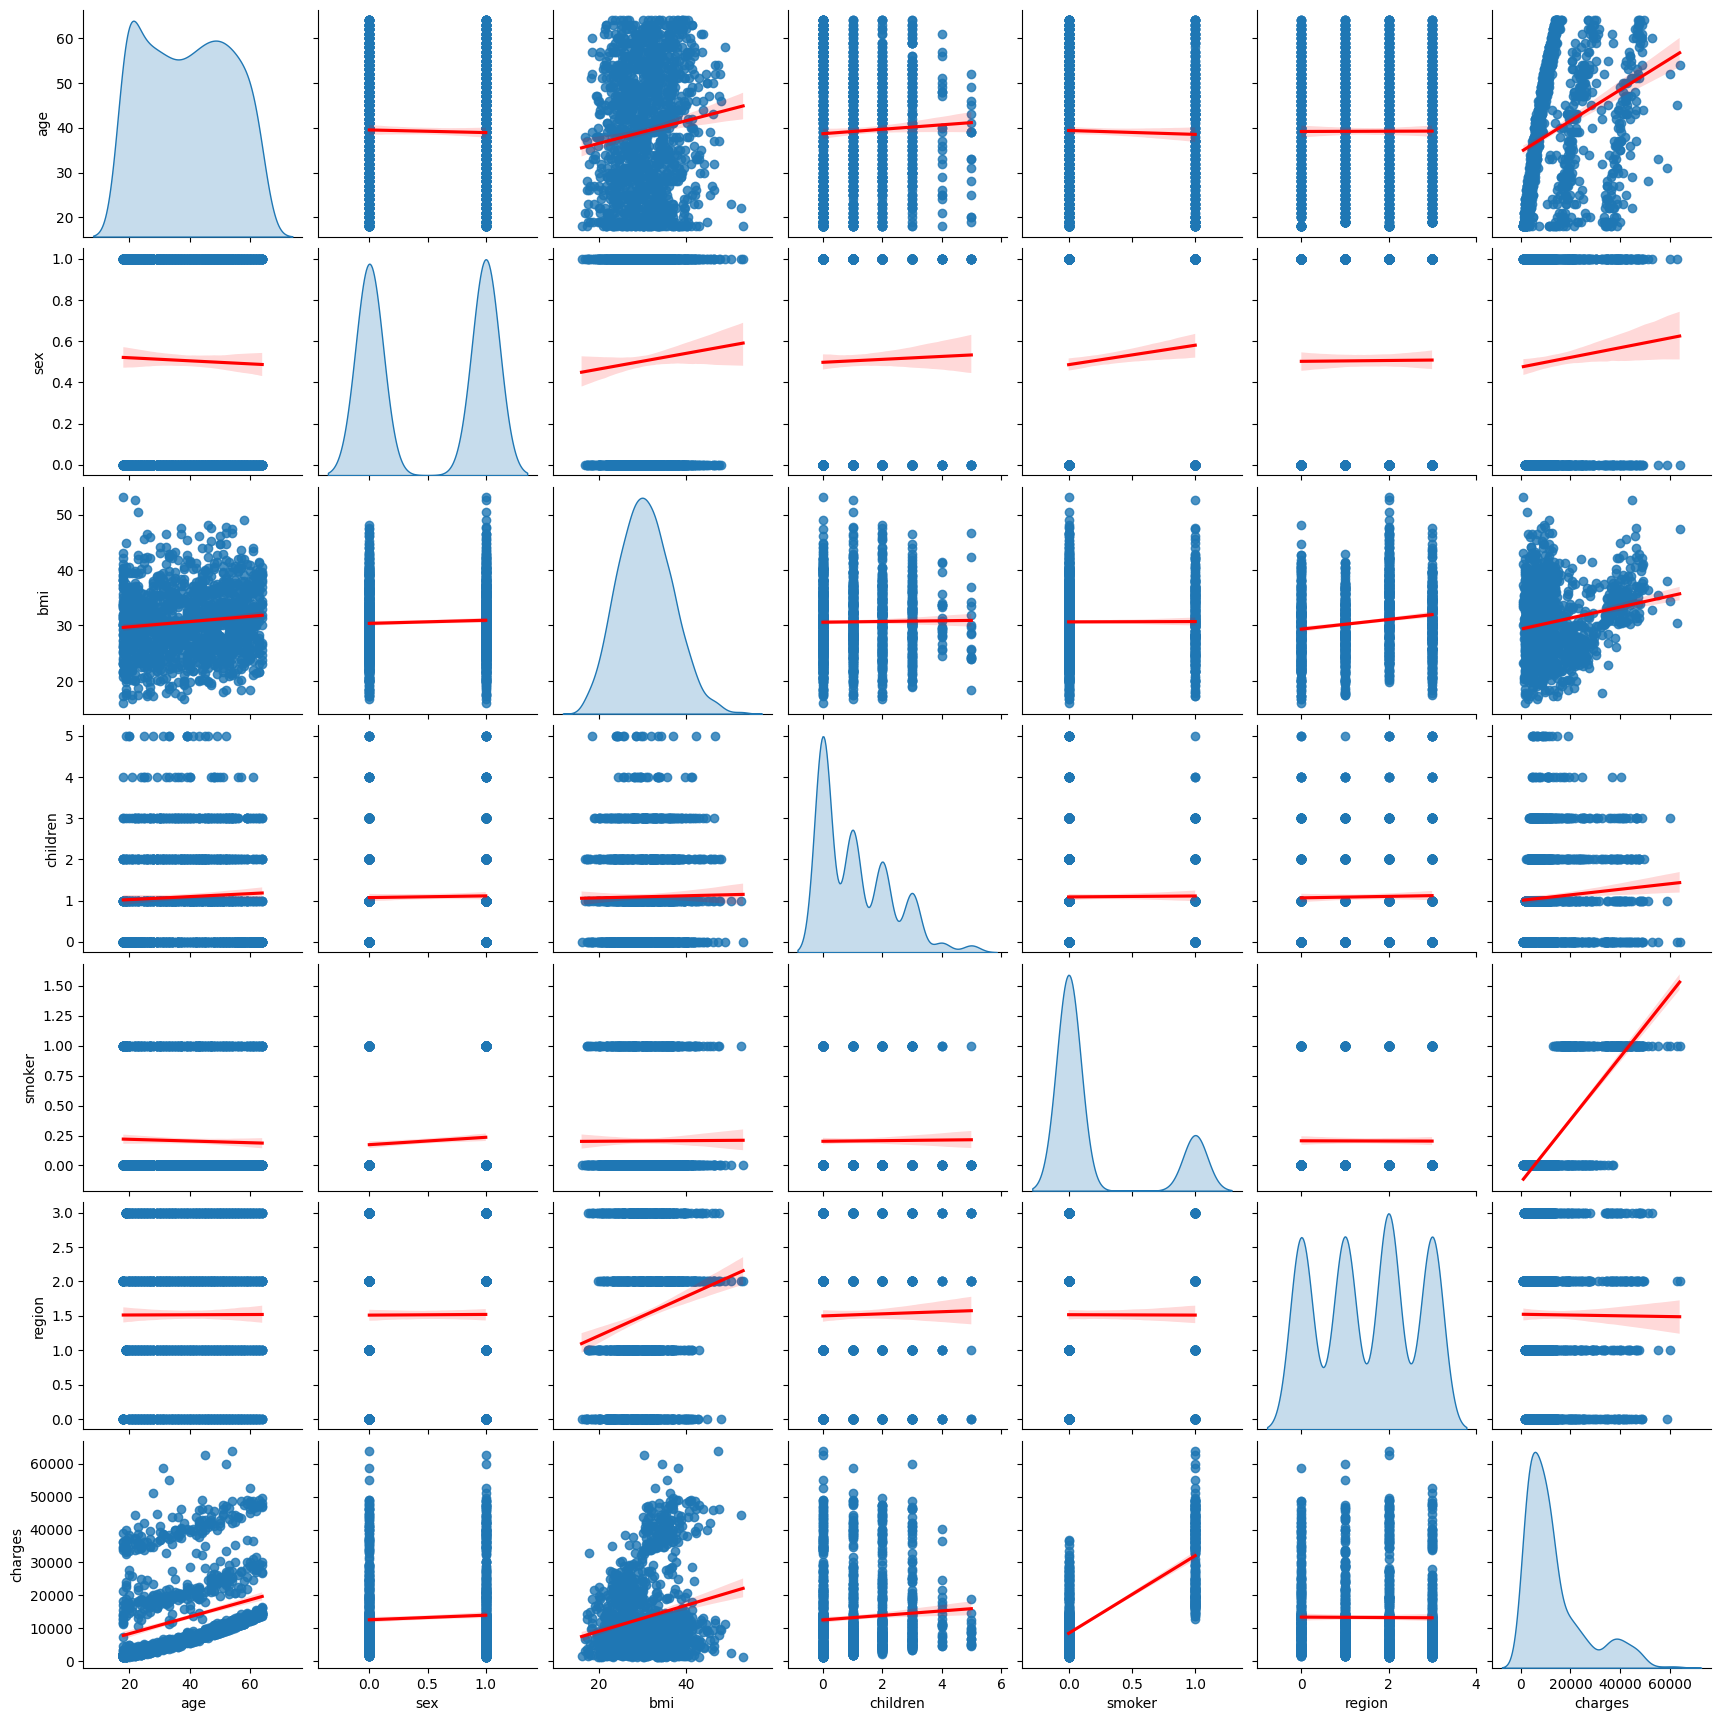

In [19]:
sns.pairplot(df_norm, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})

<Axes: >

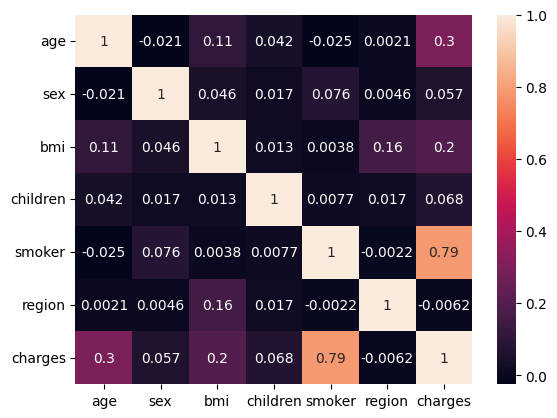

In [20]:
sns.heatmap(df_norm.corr(), annot=True)

## Análise - KNN

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
df_norm.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


### 1 - Escolha um Scaler e faça o instanciamento

In [23]:
X = df_norm.drop(columns="charges")
y = df["charges"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2 - Faça o fit transform dos dados de treino e o transform dos dados de teste

In [25]:
ss = StandardScaler().fit(X_train)
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

In [26]:
X_train.describe()

,age,sex,bmi,children,smoker,region
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,39.357009,0.512150,30.560397,1.107477,0.205607,1.508411
std,14.073960,0.500086,6.043386,1.215983,0.404334,1.115175
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.205000,0.000000,0.000000,1.000000
50%,39.500000,1.000000,30.210000,1.000000,0.000000,2.000000
75%,51.000000,1.000000,34.496250,2.000000,0.000000,2.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000


In [27]:
pd.DataFrame(X_train_ss, columns=X_train.columns).describe()

,age,sex,bmi,children,smoker,region
count,1.070000e+03,1.070000e+03,1.070000e+03,1.070000e+03,1.070000e+03,1.070000e+03
mean,-1.992176e-16,-6.308557e-17,-4.648410e-17,-2.324205e-17,2.988264e-17,-5.312469e-17
std,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00
min,-1.518194e+00,-1.024602e+00,-2.417060e+00,-9.111921e-01,-5.087470e-01,-1.353256e+00
25%,-8.784157e-01,-1.024602e+00,-7.210253e-01,-9.111921e-01,-5.087470e-01,-4.561159e-01
50%,1.016470e-02,9.759891e-01,-5.800739e-02,-8.842793e-02,-5.087470e-01,4.410238e-01
75%,8.276587e-01,9.759891e-01,6.515707e-01,7.343363e-01,-5.087470e-01,4.410238e-01
max,1.751782e+00,9.759891e-01,3.736342e+00,3.202629e+00,1.965613e+00,1.338164e+00


### 3 - Faça o fit com os dados escalados, e o target não escalado

In [28]:
knn_reg = KNeighborsRegressor()

In [29]:
knn_reg.fit(X_train_ss, y_train)

KNeighborsRegressor()

### 4 - Gere a predição com os dados de teste escalados

In [30]:
y_pred_reg = knn_reg.predict(X_test_ss)

### 5 -Analise as métricas usando matriz de confusão e classification report

Nesse caso as análises vão ser outras por se tratar de uma regressão linear e não uma regressão logística.

In [31]:
print(r2_score(y_test, y_pred_reg))

0.8345213343512302


In [32]:
mae = mean_absolute_error(y_test, y_pred_reg)
mse = mean_squared_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)

In [33]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 3045.706631309701
Mean Squared Error (MSE): 25690352.93092282
R-squared (R2) Score: 0.8345213343512302


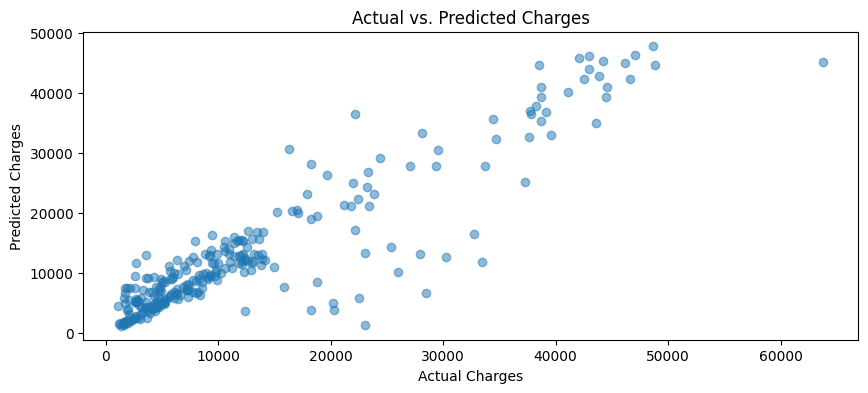

In [34]:
plt.figure(figsize=(10, 4))
plt.scatter(y_test, y_pred_reg, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges")
plt.show()

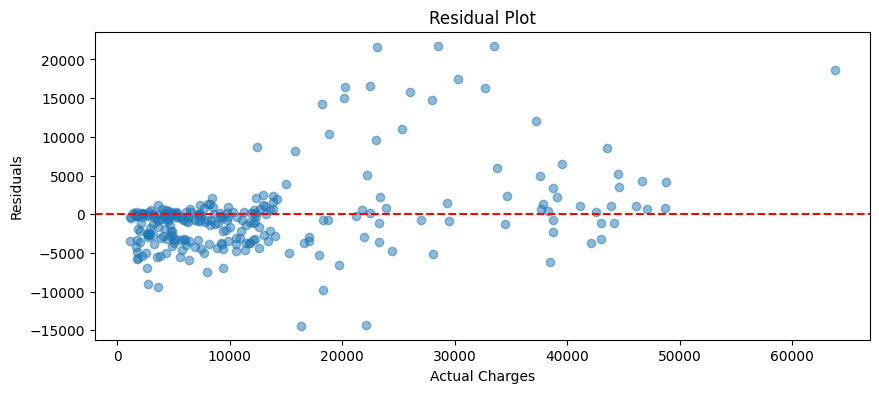

In [35]:
plt.figure(figsize=(10, 4))
residuals = y_test - y_pred_reg
plt.scatter(y_test, residuals, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


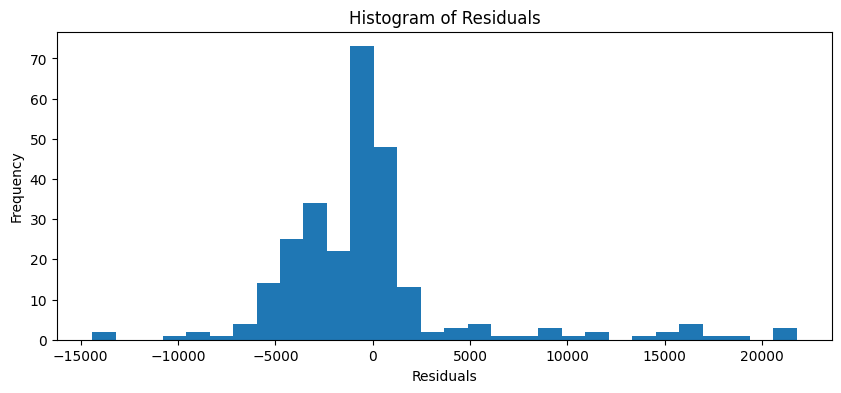

In [36]:
plt.figure(figsize=(10, 4))
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()
